In [188]:
#import the folowing for data manipulation
import pandas as pd
import numpy as np
#import the following for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import missingno
import math
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import time
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix
import datetime


In [189]:
train=pd.read_csv(r'C:\Users\kahur\OneDrive\Desktop\titanic\train.csv')
test=pd.read_csv(r'C:\Users\kahur\OneDrive\Desktop\titanic\test.csv')
gender_submission=pd.read_csv(r'C:\Users\kahur\OneDrive\Desktop\titanic\gender_submission.csv')

In [190]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [191]:
test.head()#view first 5 lines

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [192]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [193]:
#how long is the training set
len(train)

891

### DATA DESCRIPTION

1.survived: 0=No, 1=Yes

2.Pclass(Ticket class): 1=first, 2=second, 3= third

3.Sex: sex

4.Age: age of the passenger

5.SibSp: number of siblings/spouses aboard the Titanic

6.Parch: number of parents/children aboard the Titanic

7.Ticket: ticket number

8.Fare: passenger fare

9.Cabin: passenger's cabin

10.Embarked: port of embarkation, C=Cherbourg, S=Southampton, Q= Queensland

In [194]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Let us find the missing values in our dataset

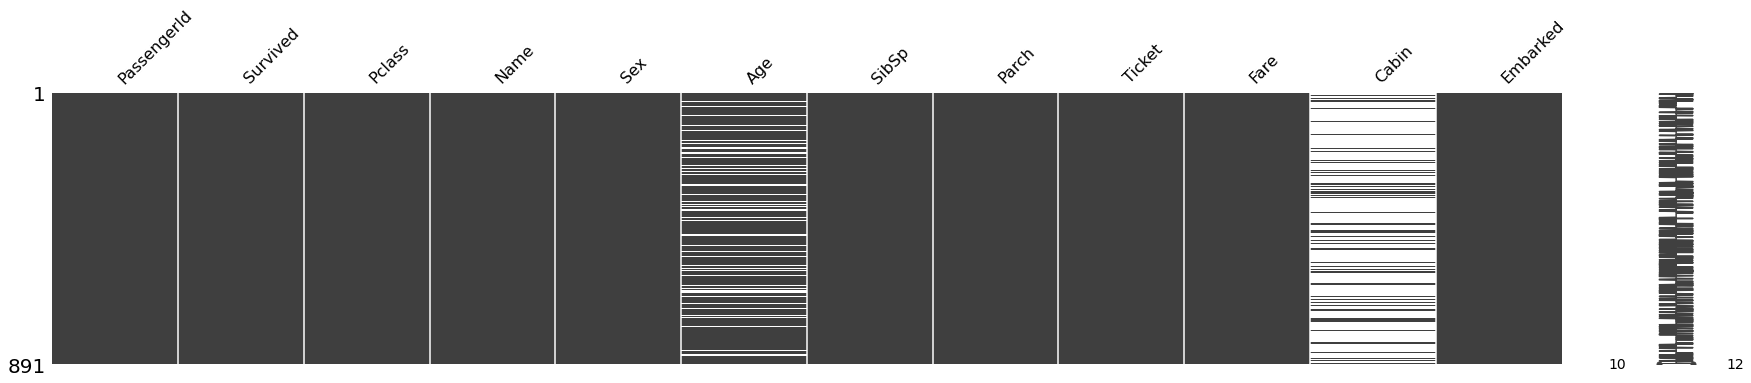

In [195]:
missingno.matrix(train, figsize=(30,5))

## To perform our data analysis, let us create two new dataframes

In [196]:
df_bin=pd.DataFrame()#for discritisized continuous variables
df_cont=pd.DataFrame()#for continuous variables

## What datatypes are in the DataFrame?


In [197]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Let us explore each of these features individually
we will go through each column iteratively and see which one to use in our first model. Some need more preprocessing than the others

## Target Feature: Survived
Description: Whether the passenger survived or not

Key: 0= did not survive, 1= survived

This is the variable we want our Machine Learning model to predict based on all the others

0    549
1    342
Name: Survived, dtype: int64


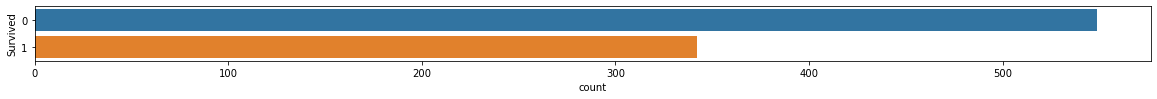

In [198]:
# How many people survived
fig= plt.figure(figsize=(20,1))
sns.countplot(y='Survived', data=train)
print(train.Survived.value_counts())

In [199]:
# Let's add this to our subset Dataframes
df_bin['Survived']=train['Survived']
df_cont['Survived']=train['Survived']

## Feature: Pclass

Description: The ticket class of the passenger

Key: 1= 1st,  2= 2nd , 3= 3rd

### Let's plot the distribution
We will look at the distribution of each feature first if we can understand what type of spread there is in the dataset

for example; If there are values which are completely outside of the distribution, we may not want to include them in our model

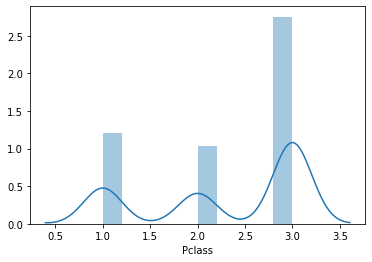

In [200]:
sns.distplot(train.Pclass)

We can see with this feature, the values are numerical(1, 2 and 3) but they are categorical

How do we know this? Because a passenger in class 3 doesn't necessarily equal a passenger in class 2 + a passenger in class 1

In [201]:
# We can check if there are missing data in the feature Pclass
train['Pclass'].isnull().sum()

0

Since there are no missing data in our feature Pclass, we can add it to our sub Dataframes

In [202]:
df_bin['Pclass']=train['Pclass']
df_cont['Pclass']=train['Pclass']

## Feature: Name

Description: The name of a passenger

In [203]:
# How many different names are there?
train.Name.value_counts()

Jermyn, Miss. Annie                         1
Jardin, Mr. Jose Neto                       1
Ohman, Miss. Velin                          1
Brocklebank, Mr. William Alfred             1
Kimball, Mr. Edwin Nelson Jr                1
                                           ..
Rosblom, Mrs. Viktor (Helena Wilhelmina)    1
Peters, Miss. Katie                         1
Dennis, Mr. Samuel                          1
Goodwin, Master. Sidney Leonard             1
Bateman, Rev. Robert James                  1
Name: Name, Length: 891, dtype: int64

Every row has a unique name.This is equivalent to the passenger id, however name can be used differently to create a new feature.

Note: To keep this EDA fast, we will not move foward with the variable Name

## Feature: Sex

Description: The gender of a passenger (male or female)

male      577
female    314
Name: Sex, dtype: int64


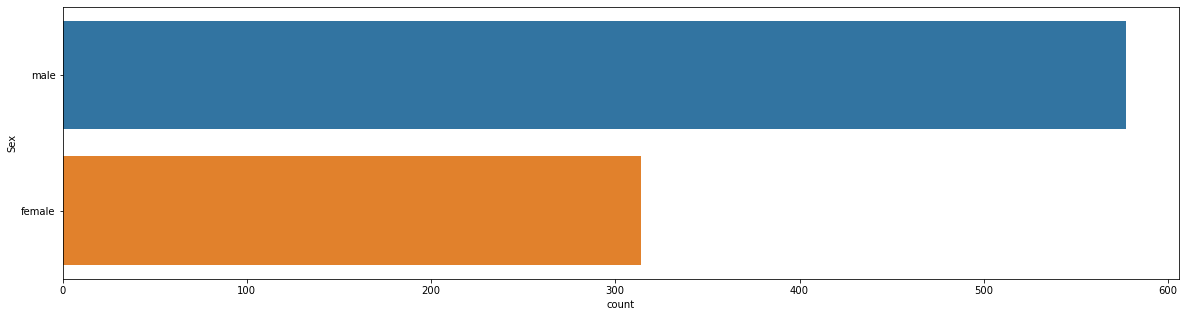

In [204]:
plt.figure(figsize=(20,5))
sns.countplot(y='Sex', data=train)
print(train.Sex.value_counts())

In [205]:
# Let's check if the variable Sex has empty instances i.e zeros
train['Sex'].isnull().sum()

0

Since this is a binary variable (male or female), let us add it to our sub-set Dataframes

In [206]:
#Add Sex to our subset DataFrames
df_bin['Sex']=train['Sex']
#df_bin.loc[df_bin['sex']==female]
df_bin['Sex']=np.where(df_bin['Sex']=='female', 1, 0)

df_cont['Sex']=train['Sex']

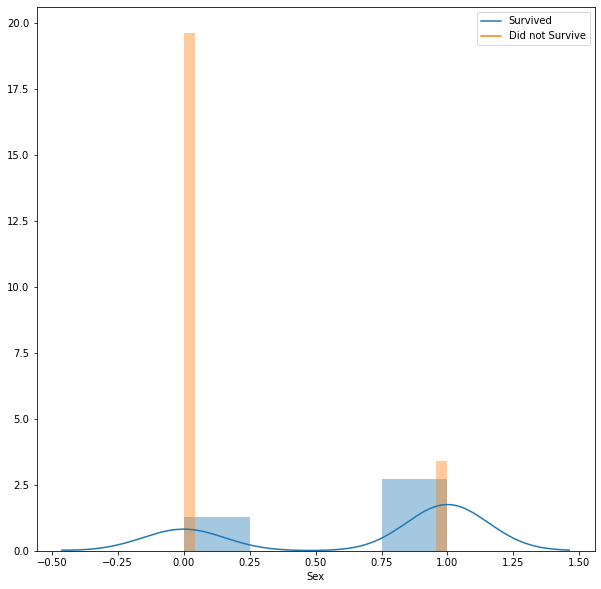

In [207]:
# How does the sex variable look compared to survival?
# We can see this because they are both binarys
fig=plt.figure(figsize=(10,10))
sns.distplot(df_bin.loc[df_bin['Survived']==1]['Sex'], kde_kws={'label': 'Survived'})
sns.distplot(df_bin.loc[df_bin['Survived']==0]['Sex'], kde_kws={'label': 'Did not Survive'})

## Feature: AGE
Description: The age of the passenger

In [208]:
# Check miising values
train['Age'].isnull().sum()

177

Out of the total 891 rows, that is almost a quarter of the dataset. We will fill up our missing age with the median of the age using pandas fillna() method

In [209]:
median=train['Age'].median()
train['Age'].fillna(median, inplace=True)

In [210]:
#Check whether the method has work, and that we don't have any more missing values
train['Age'].isnull().sum()

0

In [211]:
df_bin['Age']=pd.cut(train['Age'],10)
df_cont['Age']=train['Age']

## Feature: SibSp

Description: number of siblings/spouses aboard the Titanic

In [212]:
# Let us check if there are any missing values
train['SibSp'].isnull().sum()

0

In [213]:
# Let us check the value counts
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

It is clear that according to the data, most of the passengers were alone i.e 608. Let us add the variable to our new dataframes

In [214]:
df_bin['SibSp']=train['SibSp']
df_cont['SibSp']=train['SibSp']

In [215]:
def count_dist(data, bin_df, label_column, target_column, figsize=(20,5), use_bin_df=False):
    if use_bin_df:
        fig=plt.figure(figsize=figsize)
        plt.subplot(1,2,1)
        sns.countplot(y=target_column, data=bin_df)
        plt.subplot(1,2,2)
        sns.distplot(data.loc[data[label_column]==1][target_column], kde_kws={'label':'Survived'})
        sns.distplot(data.loc[data[label_column]==0][target_column], kde_kws={'label':'Did not Survive'})
    else:
        fig=plt.figure(figsize=figsize)
        plt.subplot(1,2,1)
        sns.countplot(y=target_column, data=data)
        plt.subplot(1,2,2)
        sns.distplot(data.loc[data[label_column]==1][target_column], kde_kws={'label':'Survived'})
        sns.distplot(data.loc[data[label_column]==0][target_column], kde_kws={'label':'Did not Survive'})

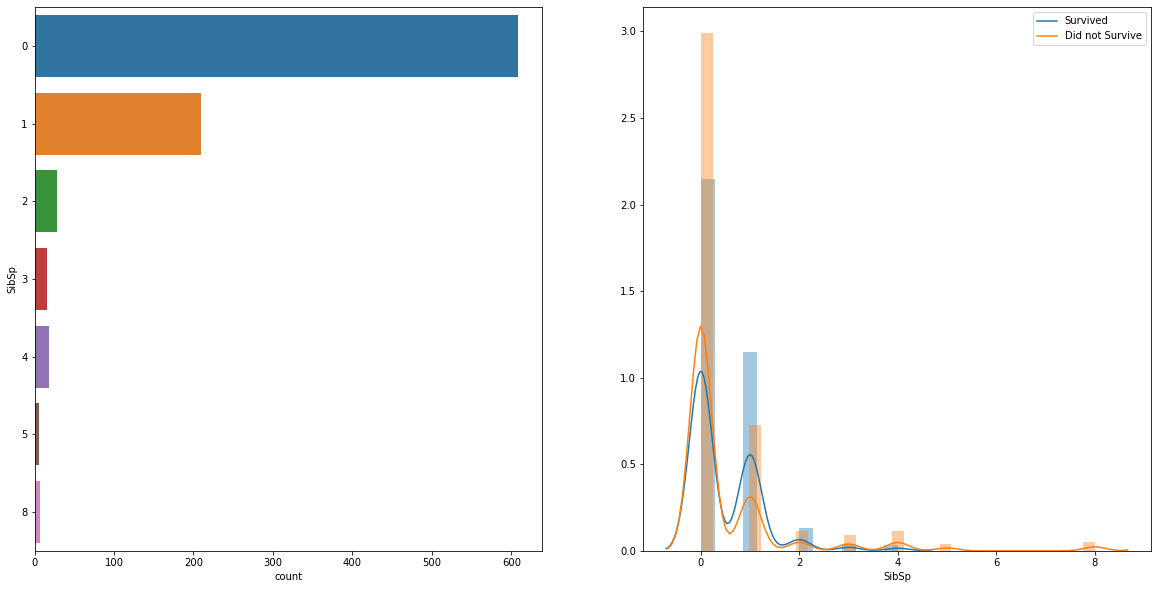

In [216]:
# Visualize the counts of SibSp and the distribution of the values
#aganist Survived

count_dist(train, bin_df=df_bin, label_column='Survived', target_column='SibSp', figsize=(20,10))

## Feature: Parch

Description: The number of parents/chidren the passenger has aboard the Titanic

In [217]:
# how many missing values 
train['Parch'].isnull().sum()

0

In [218]:
# Distribution of the values
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [219]:
df_bin['Parch']= train['Parch']
df_cont['Parch']= train['Parch']

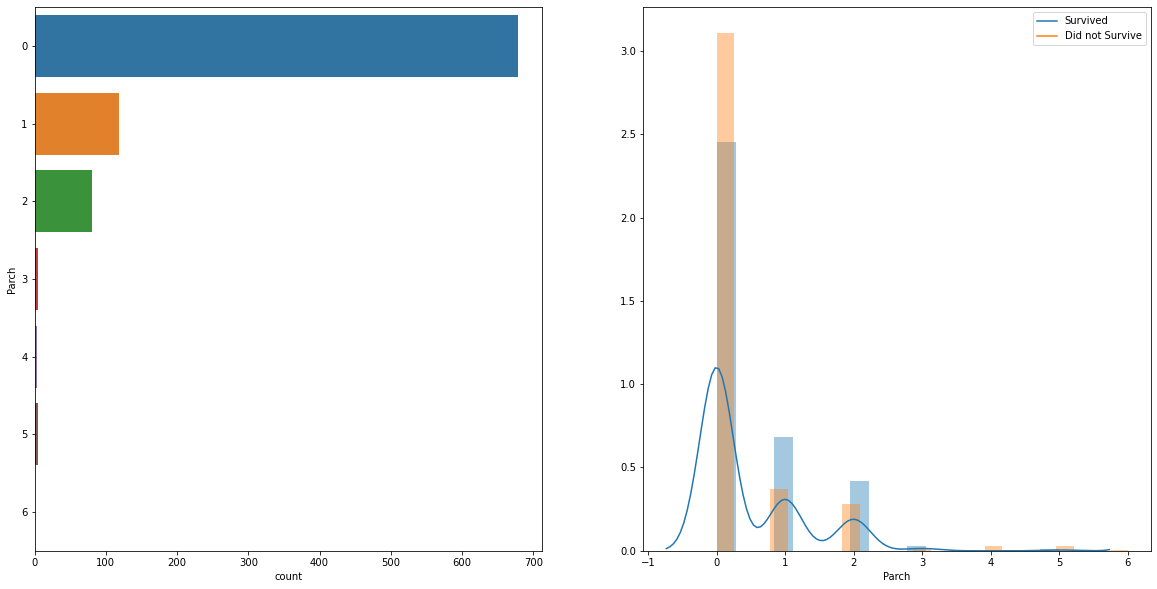

In [220]:
count_dist(train, bin_df=df_bin, label_column='Survived', target_column='Parch', figsize=(20,10))

## Feature: Ticket

Description: The type of ticket a passenger had

In [221]:
# how many missing values do we have
train['Ticket'].isnull().sum()

0

In [222]:
#how many different types of tickets were there
train['Ticket'].value_counts()

347082      7
1601        7
CA. 2343    7
CA 2144     6
3101295     6
           ..
347063      1
349223      1
350048      1
3101281     1
349912      1
Name: Ticket, Length: 681, dtype: int64

There are 681 unique ticket values. 681 unique values is too many for now, so we will not use 'Ticket' in our our subset dataframes

## Feature: Fare

Description: The amount of each ticket cost

In [223]:
# how many missing values do we have
train['Fare'].isnull().sum()

0

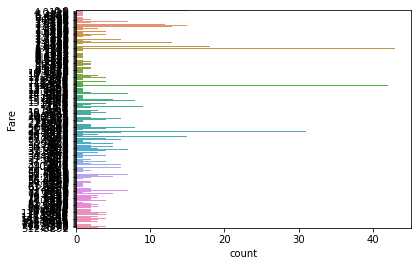

In [224]:
#how many different values of fare are there
sns.countplot(y='Fare', data=train)

In [225]:
#what type of variable is Fare
train.Fare.dtype

dtype('float64')

In [226]:
#How many unique values does the variable have
len(train.Fare.unique())

248

Beacause Fare is a float number, let us add it as it is to our continuous sub dataframe

In [227]:
df_cont['Fare']=train['Fare']
df_bin['Fare']=pd.cut(train['Fare'],5)

In [228]:
df_bin.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,"(16.336, 24.294]",1,0,"(-0.512, 102.466]"
1,1,1,1,"(32.252, 40.21]",1,0,"(-0.512, 102.466]"
2,1,3,1,"(24.294, 32.252]",0,0,"(-0.512, 102.466]"
3,1,1,1,"(32.252, 40.21]",1,0,"(-0.512, 102.466]"
4,0,3,0,"(32.252, 40.21]",0,0,"(-0.512, 102.466]"


In [229]:
df_bin.Sex.dtype

dtype('int32')

## Feature: Cabin

Description: cabin a passenger was staying 


In [230]:
#how many missing values
train['Cabin'].isnull().sum()

687

In [231]:
train.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
E101           3
F2             3
              ..
B80            1
A34            1
B30            1
B41            1
C148           1
Name: Cabin, Length: 147, dtype: int64

The Cabin feature has alot of missing values. More than 75% of the feature has missing valuess. For now, we will not use it in our sub dataframes

## Feature: Embarked

Description: The port where the passenger boarded the Titanic

Key: C= Cherbourg; Q= Queenstown; S=Southampton

In [232]:
# missing values
train['Embarked'].isnull().sum()

2

In [233]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

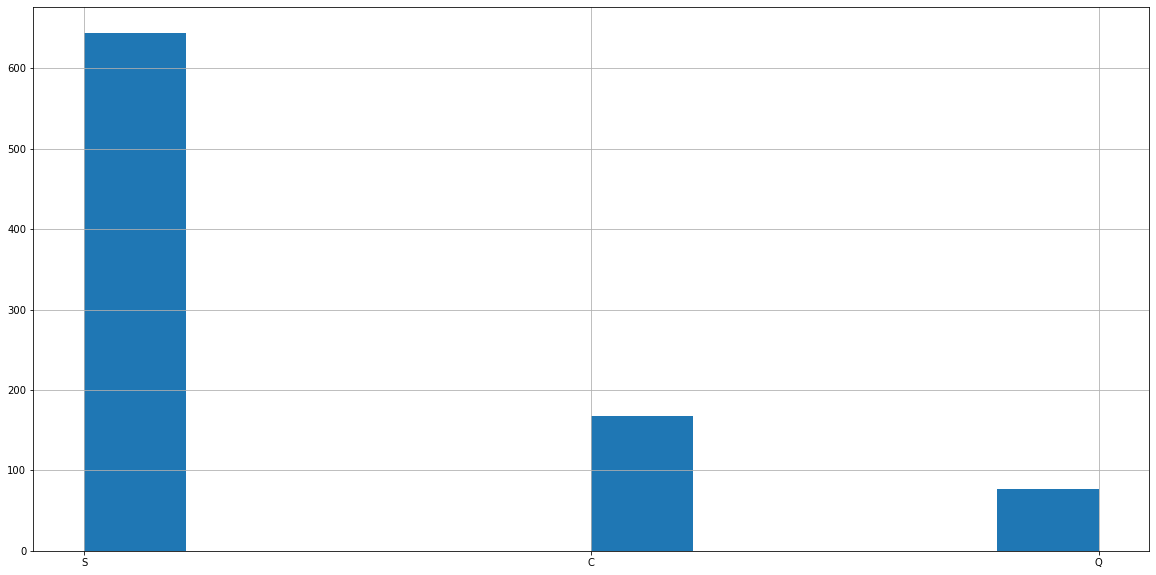

In [234]:
train.Embarked.hist(figsize=(20,10))

We will assingn the missing values the mode of the distribution

In [235]:
# Add embarked to sub dataframes
df_bin['Embarked']=train['Embarked']
df_cont['Embarked']=train['Embarked']

In [236]:
#Remove Embarked rows which have missing values
print(len(df_cont))
df_cont=df_cont.dropna(subset=['Embarked'])
df_bin=df_bin.dropna(subset=['Embarked'])
print(len(df_cont))

891
889


In [237]:
df_bin.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,"(16.336, 24.294]",1,0,"(-0.512, 102.466]",S
1,1,1,1,"(32.252, 40.21]",1,0,"(-0.512, 102.466]",C
2,1,3,1,"(24.294, 32.252]",0,0,"(-0.512, 102.466]",S
3,1,1,1,"(32.252, 40.21]",1,0,"(-0.512, 102.466]",S
4,0,3,0,"(32.252, 40.21]",0,0,"(-0.512, 102.466]",S


In [238]:
df_cont.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Feature Encoding

In [239]:
# Let us encode the binned datafarame
one_hot_columns=df_bin.columns.tolist()
one_hot_columns.remove('Survived')
df_bin_enc=pd.get_dummies(df_bin, columns=one_hot_columns)

In [240]:
df_bin_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,"Age_(0.34, 8.378]","Age_(8.378, 16.336]","Age_(16.336, 24.294]","Age_(24.294, 32.252]",...,Parch_5,Parch_6,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [241]:
# Let us encode the continuous dataFrame
df_cont_enc=df_cont.apply(LabelEncoder().fit_transform)

df_cont_enc.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,28,1,0,18,2
1,1,0,0,51,1,0,207,0
2,1,2,0,34,0,0,41,2
3,1,0,0,47,1,0,189,2
4,0,2,1,47,0,0,43,2


# Start Building Machine Learning Models

Now our data has been manipulated and converted into numbers, we can a series of different machine learning algorithms over it, to find out which yields the best result

Since we have two data sets to work on, we will choose which one to train our model with. In this notebook we choose the bin dataset. The next thing we do is we separate the dataset

In [242]:
selected_df=df_cont_enc

In [243]:
selected_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,28,1,0,18,2
1,1,0,0,51,1,0,207,0
2,1,2,0,34,0,0,41,2
3,1,0,0,47,1,0,189,2
4,0,2,1,47,0,0,43,2


In [244]:
X_train=selected_df.drop('Survived', axis=1) # features
y_train=selected_df.Survived # labels

In [245]:
# shape of the data without the labels
X_train.shape

(889, 7)

In [246]:
y_train.shape

(889,)

# Define a Function to fit Machine Learning Algorithms

In [247]:
def algo_fit(algo, X_traain, y_train, cv):
    model=algo.fit(X_train, y_train)
    acc=round(model.score(X_train, y_train)*100,2)
    #cross validation
    train_pred=cross_val_predict(algo, X_train, y_train, cv=cv, n_jobs=-1)
    #cross validation accuracy metric
    acc_cv= round(accuracy_score(y_train, train_pred)*100, 2)
    return train_pred, acc, acc_cv

# Logistic Regression

In [248]:
start_time= time.time()
train_pred_log, acc_log, acc_cv_log= algo_fit(LogisticRegression(), X_train, y_train,10)
log_time=(time.time() - start_time)
print('Accuracy: %s'% acc_log)
print('Accuracy cv 10 fold: %s'% acc_cv_log)
print('Running Time: %s'% datetime.timedelta(seconds=log_time))

Accuracy: 79.75
Accuracy cv 10 fold: 79.19
Running Time: 0:00:02.413409


# K-Nearest Neighbor

In [249]:
start_time= time.time()
train_pred_knn, acc_knn, acc_cv_knn= algo_fit(KNeighborsClassifier(), X_train, y_train,10)
log_time=(time.time() - start_time)
print('Accuracy: %s'% acc_knn)
print('Accuracy cv 10 fold: %s'% acc_cv_knn)
print('Running Time: %s'% datetime.timedelta(seconds=log_time))

Accuracy: 78.97
Accuracy cv 10 fold: 69.74
Running Time: 0:00:01.369086


# Gaussian Naive Bayes

In [250]:
start_time= time.time()
train_pred_nb, acc_nb, acc_cv_nb= algo_fit(GaussianNB(), X_train, y_train,10)
log_time=(time.time() - start_time)
print('Accuracy: %s'% acc_nb)
print('Accuracy cv 10 fold: %s'% acc_cv_nb)
print('Running Time: %s'% datetime.timedelta(seconds=log_time))

Accuracy: 76.49
Accuracy cv 10 fold: 76.27
Running Time: 0:00:00.050002


# Decision Tree Classifier

In [251]:
start_time= time.time()
train_pred_dt, acc_dt, acc_cv_dt= algo_fit(DecisionTreeClassifier(), X_train, y_train,10)
log_time=(time.time() - start_time)
print('Accuracy: %s'% acc_dt)
print('Accuracy cv 10 fold: %s'% acc_cv_dt)
print('Running Time: %s'% datetime.timedelta(seconds=log_time))

Accuracy: 97.98
Accuracy cv 10 fold: 78.52
Running Time: 0:00:00.105998


# RandomForest Classifier

In [252]:
start_time= time.time()
train_pred_frst, acc_frst, acc_cv_frst= algo_fit(RandomForestClassifier(), X_train, y_train,10)
log_time=(time.time() - start_time)
print('Accuracy: %s'% acc_frst)
print('Accuracy cv 10 fold: %s'% acc_cv_frst)
print('Running Time: %s'% datetime.timedelta(seconds=log_time))

Accuracy: 97.86
Accuracy cv 10 fold: 81.44
Running Time: 0:00:00.822301


# Gradient Boosting Classifier

In [253]:
start_time= time.time()
train_pred_gb, acc_gb, acc_cv_gb= algo_fit(GradientBoostingClassifier(), X_train, y_train,10)
log_time=(time.time() - start_time)
print('Accuracy: %s'% acc_gb)
print('Accuracy cv 10 fold: %s'% acc_cv_gb)
print('Running Time: %s'% datetime.timedelta(seconds=log_time))

Accuracy: 89.54
Accuracy cv 10 fold: 83.24
Running Time: 0:00:00.430377


# FEATURE IMPORTANCE

In [254]:
def feature_imprt(model, data):
    fea_imp= pd.DataFrame({'imp':model.feature_importances_, 'col':data.columns})
    fea_imp= fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ =fea_imp.plot(kind='barth', x='col', y='imp', figsize=(20,10))
    return fea_imp

In [255]:
gb_clf= GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier()

## Precision and Recall / confusion matrix

In [256]:
pred= cross_val_predict(gb_clf, X_train, y_train, cv=3)
confusion_matrix(y_train, pred)


array([[485,  64],
       [108, 232]], dtype=int64)

# SUBMISSION TO KAGGLE

In [257]:
test1=test.copy()
rem=['PassengerId','Name','Ticket','Cabin']
test1.drop(rem, axis=1, inplace=True)

In [258]:
test1.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [259]:
test1['Sex']=np.where(test['Sex']=='female', 1, 0)

In [260]:
test1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,Q
1,3,1,47.0,1,0,7.0000,S
2,2,0,62.0,0,0,9.6875,Q
3,3,0,27.0,0,0,8.6625,S
4,3,1,22.0,1,1,12.2875,S


In [261]:
# check whether the age column has missing values
test1['Age'].isnull().sum()

86

In [262]:

test1['Age'].fillna(median, inplace=True)

In [263]:
test1['Age'].isnull().sum()

0

In [264]:
test1['Sex'].isnull().sum()

0

In [265]:
median2=test1['Fare'].median()
test1['Fare'].fillna(median2, inplace=True)

In [266]:
test1['Fare'].isnull().sum()

0

In [267]:
test_enc=test1.apply(LabelEncoder().fit_transform)

test_enc.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,0,44,0,0,24,1
1,2,1,60,1,0,5,2
2,1,0,74,0,0,41,1
3,2,0,34,0,0,34,2
4,2,1,27,1,1,46,2


In [268]:
test_enc.shape

(418, 7)

In [269]:
X_train.shape

(889, 7)

In [270]:
predictions=gb_clf.predict(test_enc)

In [271]:
predictions

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,

In [272]:
# Create a submission dataframe and apend the relevant columns
submissions=pd.DataFrame()
submissions['PassengerId']=test['PassengerId']
submissions['Survived']=predictions

In [273]:
submissions.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0


In [274]:
submissions.shape

(418, 2)

In [277]:
submissions.to_csv(r'C:\Users\kahur\OneDrive\Documents\kaggle\titanic_sub.csv', index=False)